## Convolutional Neural Network and Fully Connected Neural Network in TF Keras
Illustrates some visualization of conv kernels  
Comapres CNN params and FCN Params



In [13]:
#    Import common python libraries
# -------------------------------------------------------------------- #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# for convolution operations
from scipy.ndimage import convolve

## 1.Illustration of Convolution Operation on images

Import some pictures from the internet to be used as examples.

In [14]:
# links to the image files
CAT_URL = 'https://i.imgur.com/UExa28W.jpg'
DOG_URL = 'https://i.imgur.com/2p3lLlW.jpg'
NUM_URL = 'https://i.imgur.com/aeCSZL1.png'

In [15]:
#    Create PIL image objects from the image URLs
# -------------------------------------------------------------------- #

cat_img = Image.open(requests.get(CAT_URL, stream=True).raw)
cat_img_gray = cat_img.convert('L')
dog_img = Image.open(requests.get(DOG_URL, stream=True).raw)
dog_img_gray = dog_img.convert('L')
num_img = Image.open(requests.get(NUM_URL, stream=True).raw)
num_img_gray = num_img.convert('L')

In [17]:
#    Convert images to numpy arrays
# -------------------------------------------------------------------- #

cat_img_gray_arr = np.array(cat_img_gray)
dog_img_gray_arr = np.array(dog_img_gray)
num_img_gray_arr = np.array(num_img_gray)

Create some filters to be used for convolution.

In [18]:
#    Create 3x3 filters
# -------------------------------------------------------------------- #

# create a vertical edge detection filter
vert_edge_filter = np.array([[1, 0, -1],
                                [1, 0, -1],
                                [1, 0, -1]])

# create a horizontal edge detection filter
horiz_edge_filter = np.array([[1, 1, 1],
                                [0, 0, 0],
                                [-1, -1, -1]])

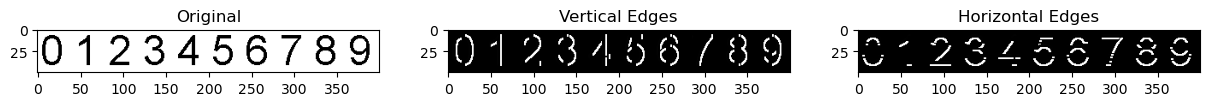

In [19]:
#    Apply filters to num image
# -------------------------------------------------------------------- #

num_vert_edge = convolve(num_img_gray_arr, vert_edge_filter)
num_horiz_edge = convolve(num_img_gray_arr, horiz_edge_filter)

# visualize the original and filtered images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(num_img_gray_arr, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(num_vert_edge, cmap='gray')
ax[1].set_title('Vertical Edges')
ax[2].imshow(num_horiz_edge, cmap='gray')
ax[2].set_title('Horizontal Edges')
plt.show()

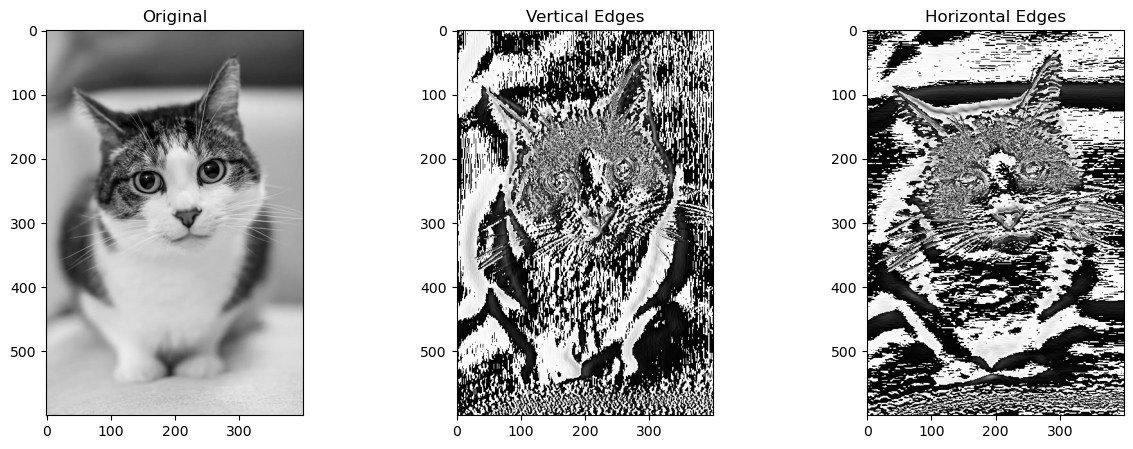

In [20]:
#    Let's try the same thing with the cat image
# -------------------------------------------------------------------- #

cat_vert_edge = convolve(cat_img_gray_arr, vert_edge_filter)
cat_horiz_edge = convolve(cat_img_gray_arr, horiz_edge_filter)

# visualize the original and filtered images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cat_img_gray_arr, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(cat_vert_edge, cmap='gray')
ax[1].set_title('Vertical Edges')
ax[2].imshow(cat_horiz_edge, cmap='gray')
ax[2].set_title('Horizontal Edges')
plt.show()

The edge detection filters worked very well for the numbers, but their efficacy for the cat image cannot be easily determined just by looking at the result here. However, that is not the point of this exercise. Several useful filters and techniques exist for image processing. For CNNs however, it is more important to understand that the filters will be learned by the machine and not be provided by humans. Those learned filters will be what the machine/network will use to detect features in the images.

## 2. Classification of images using CNNs

In this part of the exercise, we will use the Fashion MNIST dataset to train a CNN to classify images of clothing. The dataset contains 10 categories of clothing. Thus, this will be a 10 class classification.

### 2.1. Load and process data

In [61]:
#    Load the Fashion MNIST dataset
# -------------------------------------------------------------------- #

# load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# split the dataset into training and test sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# provide a name for the classes 
class_names = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

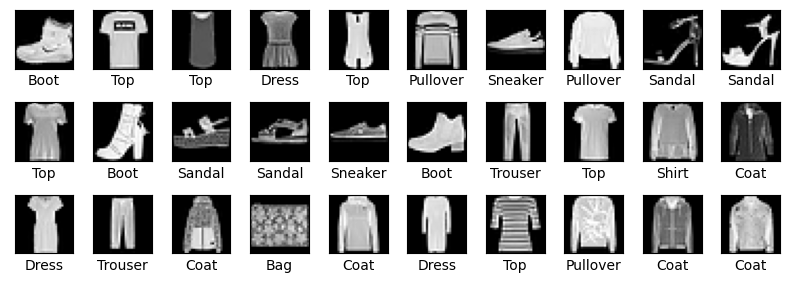

In [62]:
#    Visualize the dataset
# -------------------------------------------------------------------- #

# Plot the first 30 images from the training set and display the class name below each image.
plt.figure(figsize=(8,3))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.show()

In [63]:
#    Make sure the data is in the correct format for the model
# -------------------------------------------------------------------- #

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

### 2.2 Build and train the model

In [64]:
#    Create a convolutional neural network
# -------------------------------------------------------------------- #

# build a simple CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                38730     
Total params: 43,530
Trainable params: 43,530
Non-trainable params: 0
_________________________________________________________________


In [74]:
#    Compile and train the model
# -------------------------------------------------------------------- #

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#history = model.fit(train_images, train_labels, epochs=10)

history = model.fit(train_images, train_labels, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
329/329 [==============================] - 4s 12ms/step - loss: 0.2185 - accuracy: 0.9203 - val_loss: 0.4160 - val_accuracy: 0.8786
Epoch 2/10
329/329 [==============================] - 4s 11ms/step - loss: 0.1896 - accuracy: 0.9301 - val_loss: 0.4188 - val_accuracy: 0.8816
Epoch 3/10
329/329 [==============================] - 4s 11ms/step - loss: 0.1755 - accuracy: 0.9353 - val_loss: 0.4333 - val_accuracy: 0.8797
Epoch 4/10
329/329 [==============================] - 4s 11ms/step - loss: 0.1619 - accuracy: 0.9405 - val_loss: 0.4141 - val_accuracy: 0.8859
Epoch 5/10
329/329 [==============================] - 4s 11ms/step - loss: 0.1547 - accuracy: 0.9433 - val_loss: 0.4460 - val_accuracy: 0.8836
Epoch 6/10
329/329 [==============================] - 4s 11ms/step - loss: 0.1356 - accuracy: 0.9494 - val_loss: 0.4954 - val_accuracy: 0.8828
Epoch 7/10
329/329 [==============================] - 4s 11ms/step - loss: 0.1348 - accuracy: 0.9508 - val_loss: 0.4664 - val_accuracy: 0.8840

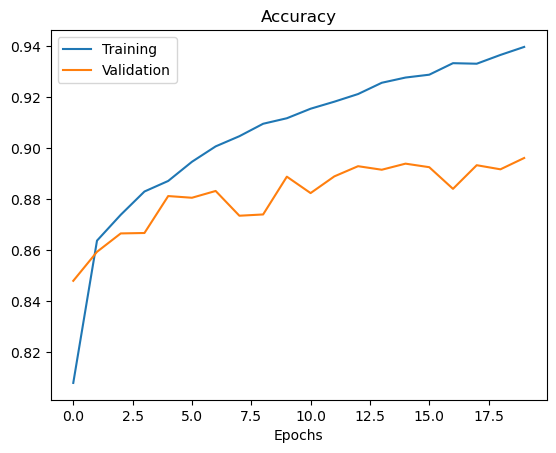

In [75]:
## Visualizing Training and Validation Accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.show()

prediction: [9 2 1 1 6 1 6 6 5 7]
actual: [9 2 1 1 6 1 4 6 5 7]


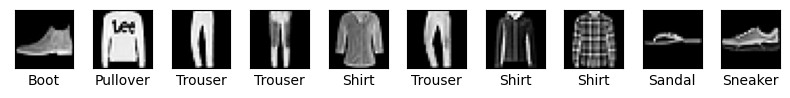

In [66]:
#    Make 10 predictions and see how the model did
# -------------------------------------------------------------------- #

predictions = model.predict(test_images[0:10])

# print the model's predictions
print('prediction:', np.argmax(predictions, axis=1))

# print the true labels
print('actual:', test_labels[0:10])

#    Visualize the model's predictions
# -------------------------------------------------------------------- #

# plot the first 10 images from the test set and display the class name below each image.
plt.figure(figsize=(8,3))
for i in range(10):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.xlabel(class_names[np.argmax(predictions[i])])
plt.tight_layout()
plt.show()

### 2.3 Visualize learned weights

In [67]:
#    Check the layers in the model
# -------------------------------------------------------------------- #

model.layers

In [68]:
#    Visualize the learned filters for each convolutional layer
# -------------------------------------------------------------------- #

# get the weights from the convolutional layers
weights_0 = model.layers[0].get_weights()[0]
weights_2 = model.layers[2].get_weights()[0]
print('The convolution Filter shape at each layer are :\n')
print(weights_0.shape)
print(weights_2.shape)

The convolution Filter shape at each layer are :

(3, 3, 1, 16)
(3, 3, 16, 32)


In [69]:
# check the numbers in one of the filters
weights_0[:,:,0,0]

array([[-0.04992366,  0.01585292, -0.0243954 ],
       [ 0.16546632, -0.09151317, -0.18993647],
       [-0.07710495,  0.17376275,  0.05829163]], dtype=float32)

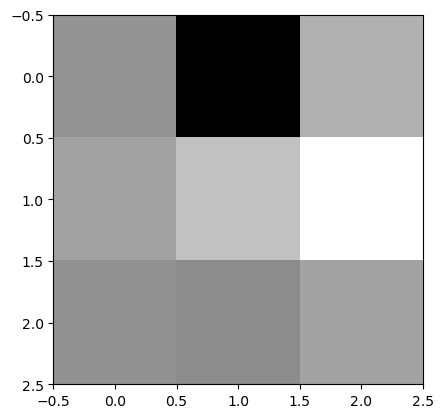

In [70]:
# we can also visualize this filter
plt.imshow(weights_0[:,:,0,5], cmap='gray')
plt.show()

### 2.4 Visualize layer outputs

We can visualize the output of a layer by building a sub-model of the trained model up to that particular layer.

In [71]:
#    Build submodels from trained model
# -------------------------------------------------------------------- #

submodel_0 = tf.keras.models.Model(inputs=model.input, outputs=model.layers[0].output)
submodel_2 = tf.keras.models.Model(inputs=model.input, outputs=model.layers[2].output)

Once the submodels are built, we can use them to predict the output of the layer for a given input image.

In [72]:
#    Get the output of the submodels
# -------------------------------------------------------------------- #

output_0 = submodel_0.predict(test_images[0:10].reshape(10, 28, 28, 1))
output_2 = submodel_2.predict(test_images[0:10].reshape(10, 28, 28, 1))

In [73]:
print(output_0.shape)
print(output_2.shape)

(10, 26, 26, 16)
(10, 11, 11, 32)


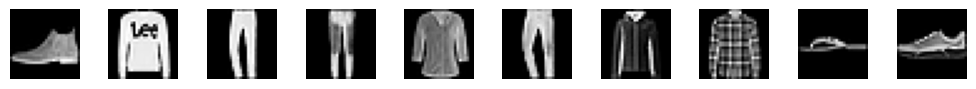

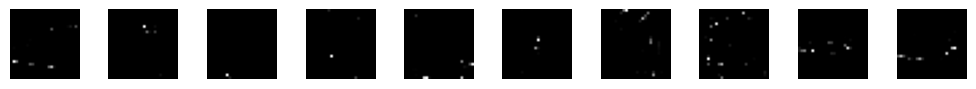

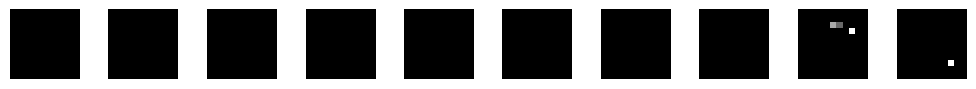

In [46]:
#    Plot the output of the submodels
# -------------------------------------------------------------------- #

# plot the input, output of the first convolutional layer, and output of the second convolutional layer side by side
for output in [test_images[0:10], output_0, output_2]:
    plt.figure(figsize=(10, 1))
    for i in range(output.shape[0]):
        plt.subplot(1, 10, i+1)
        plt.imshow(output[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## 3. Classification Using Fully Connected Neural Nets


In [47]:
#    Make sure the data is in the correct format for the model
# -------------------------------------------------------------------- #
train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)

print('Training data ',train_images.shape,'-',train_labels.shape)
print('Test data ',test_images.shape,'-',test_labels.shape)

Training data  (60000, 784) - (60000,)
Test data  (10000, 784) - (10000,)


In [48]:
# Scaling data 
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255.0
test_images /= 255.0

# Categorical encoding
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

print(train_labels[2])
print(train_labels_cat[2])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1. Build a Fully connected neural network with 3 hidden layers and compute Training and Test Accuracy.

In [49]:
#    Create a fully connected neural network
# -------------------------------------------------------------------- #

# build a simple NN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_dim = 28*28, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [50]:
#    Compile and train the model
# -------------------------------------------------------------------- #

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fitting fully connected model with validation_split as 0.3
h = model.fit(train_images, train_labels_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/20
329/329 [==============================] - 3s 8ms/step - loss: 0.5512 - accuracy: 0.8078 - val_loss: 0.4251 - val_accuracy: 0.8479
Epoch 2/20
329/329 [==============================] - 2s 7ms/step - loss: 0.3866 - accuracy: 0.8637 - val_loss: 0.3852 - val_accuracy: 0.8593
Epoch 3/20
329/329 [==============================] - 2s 7ms/step - loss: 0.3451 - accuracy: 0.8738 - val_loss: 0.3662 - val_accuracy: 0.8665
Epoch 4/20
329/329 [==============================] - 2s 7ms/step - loss: 0.3170 - accuracy: 0.8830 - val_loss: 0.3730 - val_accuracy: 0.8667
Epoch 5/20
329/329 [==============================] - 2s 7ms/step - loss: 0.2973 - accuracy: 0.8871 - val_loss: 0.3316 - val_accuracy: 0.8812
Epoch 6/20
329/329 [==============================] - 2s 7ms/step - loss: 0.2819 - accuracy: 0.8946 - val_loss: 0.3324 - val_accuracy: 0.8805
Epoch 7/20
329/329 [==============================] - 2s 7ms/step - loss: 0.2692 - accuracy: 0.9007 - val_loss: 0.3229 - val_accuracy: 0.8832
Epoch 

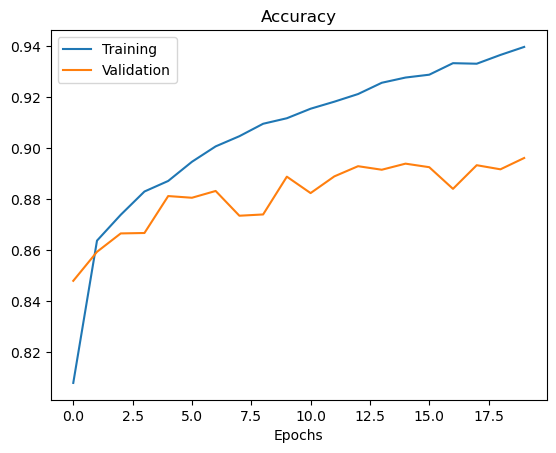

In [51]:
## Visualizing Training and Validation Accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [52]:
test_accuracy = model.evaluate(test_images, test_labels_cat)[1]
print("Test Accuracy", np.round((test_accuracy)*100, 2))

313/313 [==============================] - 1s 5ms/step - loss: 0.3739 - accuracy: 0.8864
Test Accuracy 88.64


2. Build a Fully connected neural network with 5 hidden layers and compute Training and Test Accuracy. 

In [53]:
#    Create a fully connected neural network
# -------------------------------------------------------------------- #

# build a simple NN model
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(768, input_dim = 28*28, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 768)               602880    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               393728    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,162,122
Trainable params: 1,162,122
Non-trainable params: 0
_________________________________________________________________


In [54]:
#    Compile and train the model
# -------------------------------------------------------------------- #

model1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fitting fully connected model with validation_split as 0.3
h1 = model1.fit(train_images, train_labels_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
329/329 [==============================] - 4s 11ms/step - loss: 0.6497 - accuracy: 0.7607 - val_loss: 0.7536 - val_accuracy: 0.7425
Epoch 2/10
329/329 [==============================] - 4s 11ms/step - loss: 0.4304 - accuracy: 0.8430 - val_loss: 0.5310 - val_accuracy: 0.8014
Epoch 3/10
329/329 [==============================] - 4s 11ms/step - loss: 0.3779 - accuracy: 0.8629 - val_loss: 0.3980 - val_accuracy: 0.8626
Epoch 4/10
329/329 [==============================] - 4s 11ms/step - loss: 0.3440 - accuracy: 0.8758 - val_loss: 0.4331 - val_accuracy: 0.8531
Epoch 5/10
329/329 [==============================] - 4s 11ms/step - loss: 0.3240 - accuracy: 0.8806 - val_loss: 0.5097 - val_accuracy: 0.8330
Epoch 6/10
329/329 [==============================] - 4s 11ms/step - loss: 0.3123 - accuracy: 0.8853 - val_loss: 0.4289 - val_accuracy: 0.8639
Epoch 7/10
329/329 [==============================] - 4s 11ms/step - loss: 0.2969 - accuracy: 0.8904 - val_loss: 0.4280 - val_accuracy: 0.8644

In [ ]:
# Visualizing Training and Validation Accuracy


%matplotlib inline
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [ ]:
test_accuracy = model.evaluate(test_images, test_labels_cat)[1]
print("Test Accuracy", np.round((test_accuracy)*100, 2))

3. Compare numbers of parameters and Accuracy of Fully Connected Neural Network with that CNN example above. 

For the fully connected neural network with 3 hidden layers, we had 235,146 total parameters. After 10 epochs, we had a training accuracy of roughly 86% and a test accuracy of 79.54%. Next, for the fully connected network with 5 hidden layers, we had 1,162,122 total parameters (nearly 5 times the amount as before). Here, we ended up with a training accuracy of slightly over 85% and a test accuracy of 85.19%. So, by adding two additional hidden layers to our network we increased our test accuracy by a solid 5 points. Paled in comparison to the initial CNN example, our validation accuracies after 10 epochs were noticeabily different. Under our fully connected neural network with 5 layers, we had a final validation accuracy of 85.93% whereas the CNN had a valdiation accuracy of 92.84%. Additionally, the number of paramaters used is extremely small with the CNN (43,530 vs. 1,162,122). 